In [1]:
import numpy as np
import pandas as pd 
import os
from tqdm import tqdm_notebook
from ipywidgets import interact_manual

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

pd.options.display.max_columns = 110
pd.options.display.max_rows = 300
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.simplefilter('ignore')

In [2]:
data_types = {
    
'YEAR':object,
# 'TRI_FACILITY_ID': object,
# 'FRS_ID':object,
#'FACILITY_NAME':object,
# # 'STREET_ADDRESS':object,
'CITY':object,
'COUNTY':object,
'ST':'object',
# 'ZIP':object,
# 'BIA_CODE':'category',
#'TRIBE':object,
'LATITUDE':object,
'LONGITUDE':object,
#'FEDERAL_FACILITY':'category',
# 'INDUSTRY_SECTOR_CODE':'category',
'INDUSTRY_SECTOR':'category',
# 'PRIMARY_SIC':'category',
# 'SIC_2':'category',
# 'SIC_3':'category',
# 'SIC_4':'category',
# 'SIC_5':'category',
# 'SIC_6':'category',
# 'PRIMARY_NAICS':'category',
# 'NAICS_2':'category',
# 'NAICS_3':'category',
# 'NAICS_4':'category',
# 'NAICS_5':'category',
# 'NAICS_6':'category',
# 'DOC_CTRL_NUM':object,
'CHEMICAL':'object',
# 'CAS_#/COMPOUND_ID':object,
# 'SRS_ID':object,
# 'CLEAR_AIR_ACT_CHEMICAL':'category',
# 'CLASSIFICATION':'category',
# 'METAL':'category',
# 'METAL_CATEGORY':int,
# 'CARCINOGEN':'category',
# 'FORM_TYPE':'category',
'UNIT_OF_MEASURE':object,
# '5.1_FUGITIVE_AIR':object,
# '5.2_STACK_AIR':float,
# '5.3_WATER':float,
# '5.4_UNDERGROUND':float,
# '5.4.1_UNDERGROUND_CLASS_I':float,
# '5.4.2_UNDERGROUND_CLASS_II-V':float,
# '5.5.1_LANDFILLS':float,
# '5.5.1A_RCRA_C_LANDFILLS':float,
# '5.5.1B_OTHER_LANDFILLS':float,
# '5.5.2_LAND_TREATMENT':float,
# '5.5.3_SURFACE_IMPOUNDMENT':float,
# '5.5.3A_RCRA_C_SURFACE_IMP.':float,
# '5.5.3B_Other_SURFACE_IMP.':float,
# '5.5.4_OTHER_DISPOSAL':float,
# 'ON-SITE_RELEASE_TOTAL':float,
# '6.1_POTW-TRANSFERS_FOR_RELEASE':float,
# '6.1_POTW-TRANSFERS_FOR_TREATM.':float,
# '6.1_POTW-TOTAL_TRANSFERS':float,
# '6.2_M10':float,
# '6.2_M41':float,
# '6.2_M62':float,
# '6.2_M71':float,
# '6.2_M81':float,
# '6.2_M82':float,
# '6.2_M72':float,
# '6.2_M63':float,
# '6.2_M66':float,
# '6.2_M67':float,
# '6.2_M64':float,
# '6.2_M65':float,
# '6.2_M73':float,
# '6.2_M79':float,
# '6.2_M90':float,
# '6.2_M94':float,
# '6.2_M99':float,
# 'OFF-SITE_RELEASE_TOTAL':float,
# '6.2_M20':float,
# '6.2_M24':float,
# '6.2_M26':float,
# '6.2_M28':float,
# '6.2_M93':float,
# 'OFF-SITE_RECYCLED_TOTAL':float,
# '6.2_M56':float,
# '6.2_M92':float,
# 'OFF-SITE_RECOVERY_TOTAL':float,
# '6.2_M40':float,
# '6.2_M50':float,
# '6.2_M54':float,
# '6.2_M61':float,
# '6.2_M69':float,
# '6.2_M95':float,
# 'OFF-SITE_TREATED_TOTAL':float,
'TOTAL_RELEASES':object,
# '8.1_RELEASES':object,
# '8.1A_ON-SITE_CONTAINED_REL.':float,
# '8.1B_ON-SITE_OTHER_RELEASES':float,
# '8.1C_OFF-SITE_CONTAINED_REL.':float,
# '8.1D_OFF-SITE_OTHER_RELEASES':float,
# '8.2_ENERGY_RECOVERY_ON-SITE':float,
# '8.3_ENERGY_RECOVERY_OFF-SITE':float,
# '8.4_RECYCLING_ON-SITE':float,
# ' 8.5_RECYCLING_OFF-SITE':float,
# '8.6_TREATMENT_ON-SITE':float,
# # '8.7_TREATMENT_OFF-SITE':float,
# 'PROD._WASTE_(8.1_THRU_8.7)':float
# '8.8_ONE-TIME_RELEASE':float,
# 'PROD_RATIO_OR_ACTIVITY':object,
# '8.9_PRODUCTION_RATIO':float,
#'PARENT_COMPANY_NAME':object,
# 'PARENT_COMPANY_DB_NUMBER':object,
}

In [3]:
%%time

data_read1 = pd.read_csv('C:\\Users\\Gayathri/basic_data_files.csv', nrows=2548770, low_memory=True, dtype=data_types, usecols=data_types.keys())

data_read2 = pd.read_csv('C:\\Users\\Gayathri/basic_data_files.csv', skiprows=2548771, low_memory=True, dtype=data_types, usecols=data_types.keys())

data_merge = data_read1.append(data_read2, ignore_index=True)
data_merge = data_merge.drop(index=data_merge[data_merge.YEAR == 'YEAR'].index).reset_index(drop=True)

Wall time: 19.7 s


In [5]:
#Data types are redefined for manipulation
data_types = {'YEAR': int,'CITY': 'category','COUNTY': 'category','ST': 'category','CHEMICAL':'category', 'TOTAL_RELEASES': float,
         'LATITUDE': float, 'LONGITUDE': float, 'INDUSTRY_SECTOR':'category','UNIT_OF_MEASURE':object}
final_data = data_merge.astype(data_types)

In [6]:
final_data['TOTAL_RELEASES'] = final_data['TOTAL_RELEASES'].round(decimals=2)

In [7]:
final_data.shape

(5051263, 10)

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051263 entries, 0 to 5051262
Data columns (total 10 columns):
 #   Column           Dtype   
---  ------           -----   
 0   YEAR             int32   
 1   CITY             category
 2   COUNTY           category
 3   ST               category
 4   LATITUDE         float64 
 5   LONGITUDE        float64 
 6   INDUSTRY_SECTOR  category
 7   CHEMICAL         category
 8   UNIT_OF_MEASURE  object  
 9   TOTAL_RELEASES   float64 
dtypes: category(5), float64(3), int32(1), object(1)
memory usage: 212.5+ MB


In [9]:
final_data.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,CHEMICAL,UNIT_OF_MEASURE,TOTAL_RELEASES
0,2016,NEW CARLISLE,ST JOSEPH,IN,41.69,-86.46,Fabricated Metals,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,Pounds,1170.41
1,2016,NEWBURYPORT,ESSEX,MA,42.80,-70.89,Chemicals,CERTAIN GLYCOL ETHERS,Pounds,18.00
2,2016,WOOSTER,WAYNE,OH,40.78,-81.94,Food,ZINC COMPOUNDS,Pounds,0.00
3,2016,NEW BEDFORD,BRISTOL,MA,41.73,-70.96,Miscellaneous Manufacturing,DIISOCYANATES,Pounds,0.00
4,2016,FOREST PARK,CLAYTON,GA,33.63,-84.39,Chemicals,CERTAIN GLYCOL ETHERS,Pounds,50.00


In [10]:
final_data.tail()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,CHEMICAL,UNIT_OF_MEASURE,TOTAL_RELEASES
5051258,1987,FENTON,ST LOUIS,MO,38.55,-90.46,Transportation Equipment,BARIUM COMPOUNDS,Pounds,8950.00
5051259,1987,PHILADELPHIA,PHILADELPHIA,PA,39.96,-75.16,Chemicals,CARBON TETRACHLORIDE,Pounds,123932.00
5051260,1987,EL SEGUNDO,LOS ANGELES,CA,33.91,-118.41,Petroleum,COBALT COMPOUNDS,Pounds,441.00
5051261,1987,MILWAUKEE,MILWAUKEE,WI,43.13,-88.00,Chemicals,BARIUM,Pounds,110.00
5051262,1987,NEW MADRID,NEW MADRID,MO,36.51,-89.58,Primary Metals,COPPER,Pounds,0.00


In [11]:
data_2016 = final_data[final_data.YEAR.eq(2016)]
data_2016.shape

(238065, 10)

In [12]:
industry_releases = data_2016.groupby('INDUSTRY_SECTOR', as_index=False)['TOTAL_RELEASES'].sum()
industry_releases.drop(industry_releases[industry_releases['INDUSTRY_SECTOR'] == 'INDUSTRY_SECTOR'].index, inplace = True)
industry_releases.drop(industry_releases[industry_releases['TOTAL_RELEASES'] < 1000000].index, inplace = True)

industry_releases = industry_releases.sort_values(by = ['TOTAL_RELEASES'], ascending=False)
industry_releases

,INDUSTRY_SECTOR,TOTAL_RELEASES
13,Metal Mining,4566381597.00
2,Chemicals,1562666663.73
5,Electric Utilities,1104794010.72
21,Primary Metals,1042358865.15
17,Paper,510239821.80
10,Hazardous Waste,438258931.05
8,Food,414914910.09
18,Petroleum,227341062.09
7,Fabricated Metals,139245009.09
16,Other,136175972.73


In [13]:
subset = data_2016.groupby(['INDUSTRY_SECTOR']).agg({'TOTAL_RELEASES': 'sum'})
subset = subset.reset_index()
subset_industry = industry_releases.head()
subset_industry

,INDUSTRY_SECTOR,TOTAL_RELEASES
13,Metal Mining,4566381597.00
2,Chemicals,1562666663.73
5,Electric Utilities,1104794010.72
21,Primary Metals,1042358865.15
17,Paper,510239821.80


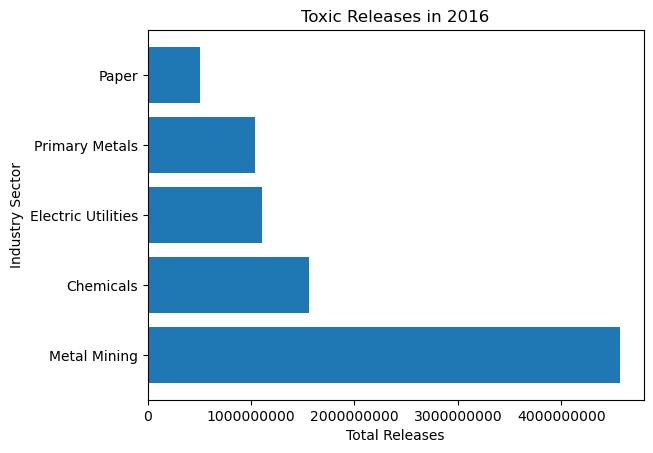

In [15]:
import matplotlib.pyplot as plt;
plt.rcdefaults()

fig,ax = plt.subplots()
subset_industry = industry_releases.head()
ax.barh(subset_industry['INDUSTRY_SECTOR'],subset_industry['TOTAL_RELEASES'])
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


plt.title('Toxic Releases in 2016')
plt.xlabel('Total Releases')
plt.ylabel('Industry Sector')

plt.show()

In [16]:
metal_mining_data = final_data[final_data['INDUSTRY_SECTOR'] == 'Metal Mining']
metal_mining_data.loc[metal_mining_data['CHEMICAL'] == 'LEAD','CHEMICAL'] = "LEAD COMPOUNDS"
metal_mining_data.shape

(28953, 10)

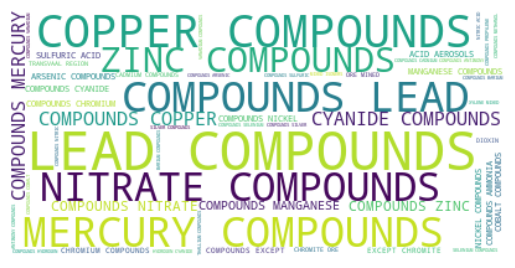

In [17]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#metal_chemicals = metal_mining_data['CHEMICAL']
#wordcloud = WordCloud().generate(metal_chemicals)
wordcloud2 = WordCloud(max_words=100, background_color="white").generate(' '.join(metal_mining_data['CHEMICAL']))

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#plot on site land disposal chemicals over time
temp = final_data.groupby(['CHEMICAL', 'YEAR']).agg({'TOTAL_RELEASES': 'sum'})
temp = temp.reset_index()

traces = []
for i in ['ZINC COMPOUNDS',
         'ARSENIC','COPPER COMPOUNDS']:
    temp_ = temp[temp['CHEMICAL'] == i]
    trace = go.Scatter(x=temp_['YEAR'], y=temp_['TOTAL_RELEASES'], name=i)
    traces.append(trace)
    
layout = go.Layout(title='On-Site Land Disposal by Chemicals in the US',
                  yaxis=dict(title='Pounds'), xaxis=dict(title='Year'))    
fig = go.Figure(data = traces, layout=layout)
py.iplot(fig)

In [19]:
years = [i for i in range(1987, 2016+1)]

# create steps for slider
def get_steps(years):
    steps = []
    for i in range(0,len(years)):
        step = dict(method = "restyle",
                    args = ["visible", [False]*len(years)],
                    label = years[i]) 
        step['args'][1][i] = True
        steps.append(step)
    return steps

# Sliders layout:
def get_sliders(steps):
    sliders = [dict(active = 10,
                    currentvalue = {"prefix": "Year: "},
                    pad = {"t": 50},
                    steps = steps)]
    return sliders

# get dataframe of only selected chemical 
def get_cont_sites(chemicals): 
    return final_data[final_data.CHEMICAL.isin([chemicals])]

# make dataframe with values for choropleth colors
def get_state_counts(cont_sites):
    # fill each year column with the number of contaminated sites in each state
    state_counts = pd.DataFrame(index=final_data[final_data.YEAR == 2016].ST.value_counts().sort_index().index.tolist(), columns=years)
    for i in years: 
        totals_temp = cont_sites[cont_sites.YEAR == i][['ST', 'TOTAL_RELEASES']].groupby(['ST']).sum().unstack()
        state_counts[i] = pd.DataFrame(index=totals_temp.index.levels[1].tolist(), data=totals_temp.values, columns=[i])

    state_counts.loc['norm'] = state_counts.max().max()
    return state_counts



steps = get_steps(years)
sliders = get_sliders(steps)

def plot_choro(Chemical='LEAD COMPOUNDS'):
    cont_sites = get_cont_sites(Chemical)
    state_counts = get_state_counts(cont_sites)

    # create a list and loop through every year, store the trace in data_bal and then update with a new year
    data_bal = []
    for i in years:
        data_upd = [dict(type='choropleth',
                         name=i,
                          colorscale = 'Reds',
                          reversescale=False,
                          locations = state_counts[i].index,
                          z = state_counts[i].values,
                          locationmode = 'USA-states',
                          colorbar = dict(title='Pounds Released Per Year')
                        )
                   ]

        data_bal.extend(data_upd)


    # Set the layout
    layout = dict(title = 'Total Released ' + Chemical + ' In Pounds',
                  geo = dict(scope='usa',
                             projection=dict( type='albers usa')),
                  sliders = sliders)

    fig = dict(data=data_bal, layout=layout)
    py.iplot(fig)

In [20]:
plot_choro(Chemical='LEAD COMPOUNDS')